Binary classification

this notebook  shows in-depth look on classifying images of cars and tanks using neural networks. Given a limited number of images, it is not enough for our model to learn to predict accurately on unseen data. The solutions are using Image Augmentation and Transfer Learning to improve the predictive power. finally, we will make  predictions whether an image is a tank or a car.

Table of contents

1.0 Import Packages

2.0 Show Number of Images Per Label

3.0 Show Sample Images of Each Label

4.0 Image Data Generator, Split Data for Training and Validation 

5.0 Modelling Neural Network by using a pretrained model

In [4]:
# importing prerequisite libraries
import os
import pandas as pd
import numpy as np
import random
import shutil
from shutil import copyfile
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 

Uploading our folder  from a local directory which contains image of tanks and cars

In [5]:
# assigning a path to our directory
base_dir = r'../tochora/popd/movie dataset/cars_tanks/'

we are going to make a dataframe that will classify images in the folder into two groups that is  cars and tanks and number of images in each group.The dataframe will consist of columns: Tran-test made up of two folders in our dataset that is test and train, labels which consist of tanks and cars images and finally number of items which has the entries of either tanks or cars.

In [6]:
# creating empty lists
my_train_test_list = []
my_label_list = []
myitems_list = []
vis_images = []; vis_labels = []
# returning the list of images contained in the base directory
train_test_list = tf.io.gfile.listdir(base_dir)
#iterating at every image in train_test_list
for train_test in train_test_list:
    #concatenating base directory with images in train_test_list
    path1 = os.path.join(base_dir, train_test)
    # returning a list of images that are going act as labels in our dataset
    label_list = os.listdir(path1)
    #iterating each label in the directory label_list
    for label in label_list:
        #concatenating images in path1 with each label in label_list
        my_path = os.path.join(path1, label)
         #getting a list of files in my_path directory
        item_files = os.listdir(my_path)

        my_train_test_list.append(train_test)
        my_label_list.append(label)
        myitems_list.append(len(item_files))

        my_files = item_files[0:5]
        for file in my_files:
            #getting each image from a respective label
            vis_images.append(os.path.join(my_path, file))
            #get a respective label for each image
            vis_labels.append(label)
#creating a dataframe to show various folders, assighned labels and entries in each label
pd.DataFrame({"Train test": my_train_test_list, "Labels": my_label_list, "Number of items": myitems_list})


,Train test,Labels,Number of items
0,test,cars,100
1,test,tanks,100
2,train,cars,568
3,train,tanks,568


Visualizing the images

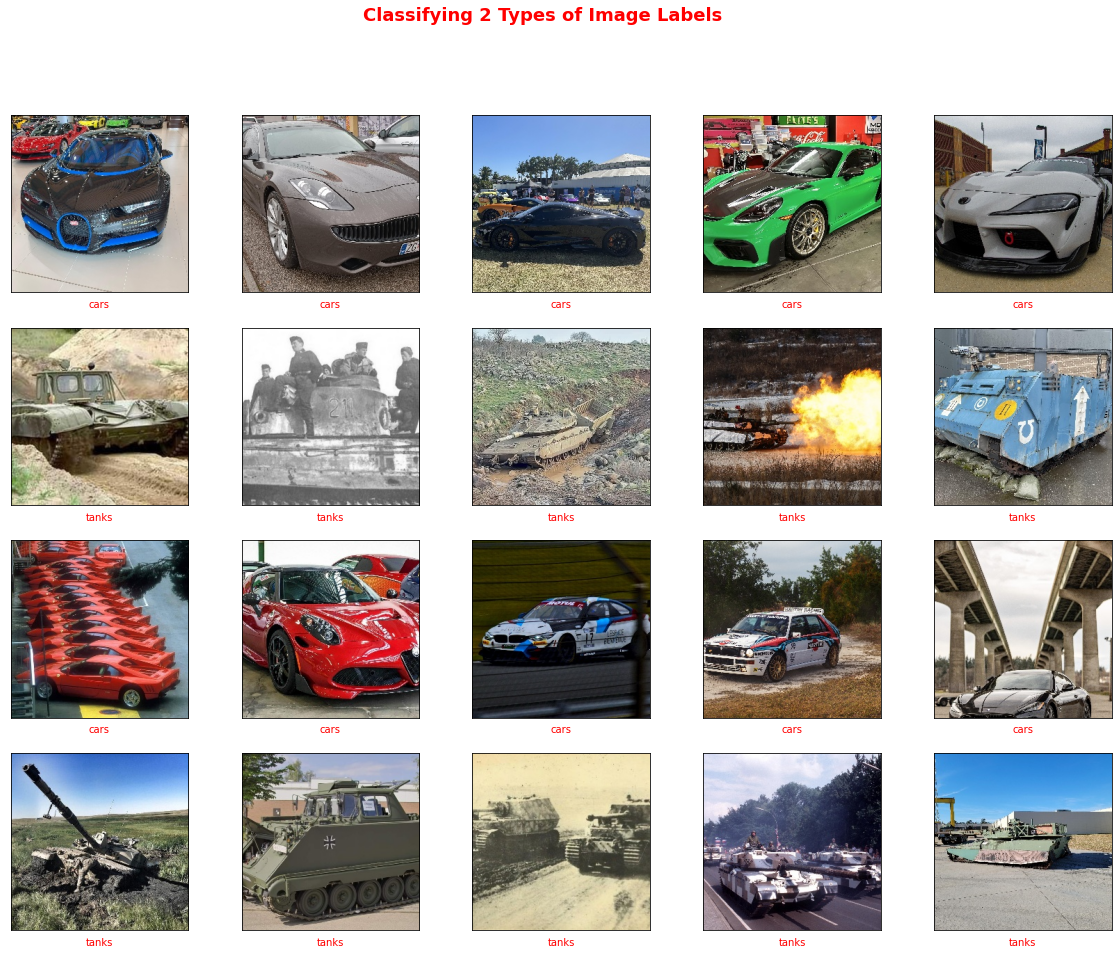

In [8]:
plt.figure(figsize=(20, 15))
for i in range (len(vis_labels)):
    plt.subplot(4, 5, i+ 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = mpimg.imread(vis_images[i])
    plt.imshow(img)
    plt.xlabel(vis_labels[i], color='red')
    plt.suptitle(f"Classifying 2 Types of Image Labels",fontsize=18, fontweight='bold', color='red')
plt.show()

Augmenting our images with imageDatagenerator

we are going to use it to augment images that we have for training .It applies various transformations to our images such scaling, angle changes and verticla shifting.this helps to generate multiple images from an image when one has a dataset that contains small number of images for training a model.This library is helpful especially when one has a small dataset.

Below is a function that will apply various tranformations to our images

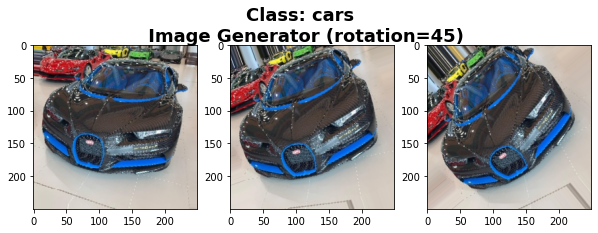

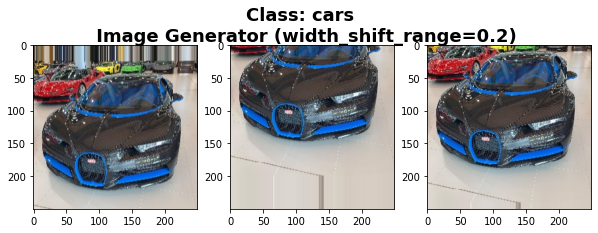

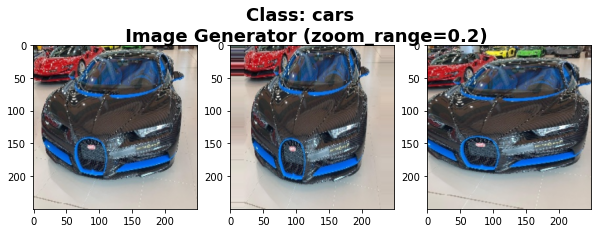

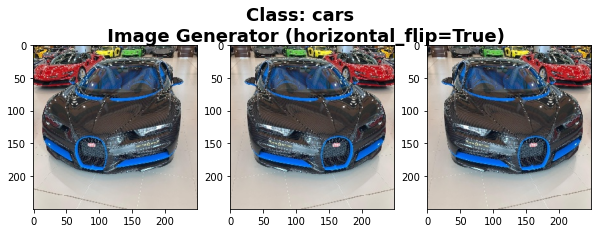

In [ ]:
# a function that generate multiple images
def show_image_generator(vis_images, vis_labels, image_index):
    class_label = vis_labels[image_index]
    img = tf.keras.preprocessing.image.load_img(vis_images[image_index], target_size=(250, 250))
    image_tensor = tf.keras.preprocessing.image.img_to_array(img)
    img_tensor = np.expand_dims(image_tensor, axis=0)

    def show_image(datagen, param):
        pic = datagen.flow(img_tensor, batch_size=1)
        plt.figure(figsize=(10, 3.5))

        for i in range(1, 4):
            plt.subplot(1, 3,i)
            batch = pic.next()
            img = batch[0].astype('uint8')
            plt.imshow(img)
        plt.suptitle(f"Class: {class_label} \n Image Generator ({param})",fontsize=18, fontweight='bold')
        plt.show()
    datagen = ImageDataGenerator(rotation_range=45)
    show_image(datagen, 'rotation=45')
    datagen = ImageDataGenerator(width_shift_range=0.2)
    show_image(datagen, 'width_shift_range=0.2')
    datagen = ImageDataGenerator(zoom_range=0.2)
    show_image(datagen, 'zoom_range=0.2')
    datagen = ImageDataGenerator(horizontal_flip=True)
    show_image(datagen, 'horizontal_flip=True')
# using our function to generate images of the same image
show_image_generator(vis_images, vis_labels, image_index=0)


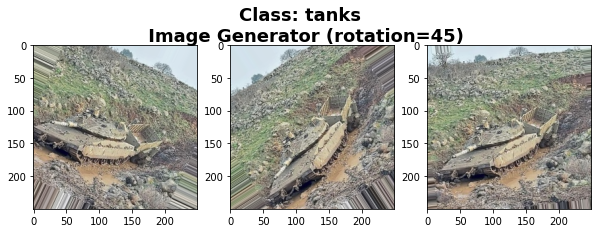

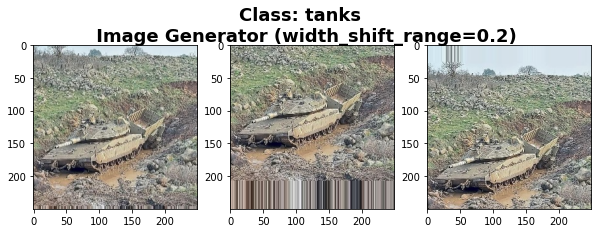

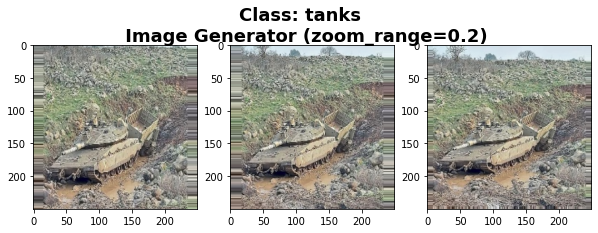

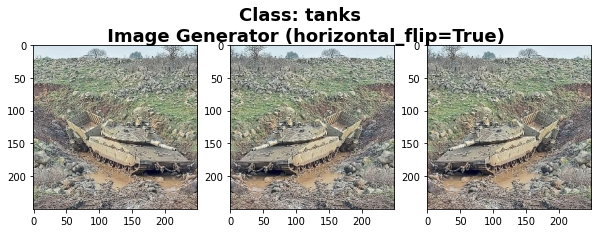

In [ ]:
# choosing another image to augement it
show_image_generator(vis_images,vis_labels, image_index=7)

The above images show how imageDataGenerator can be used to augment images and also to make various alterations on them.

Here, we are going to use imageDataGenerator to make various transformations to our images by using parameters such as rotations , rescaling, vertical shifting etc so as get image vectors for maximum feature extraction  .Flow from directory will help in assgning directory path and generating image batches.

In [ ]:
# a function that splits our dataset into training and validation data
def train_val_generators(Training_dir, Validation_dir):
    train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=45, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, shear_range=0.2, horizontal_flip=True,fill_mode='nearest')
    train_generator = train_datagen.flow_from_directory(directory=Training_dir, batch_size=32, class_mode='binary', target_size=(50, 50))
    validation_datagen = ImageDataGenerator(rescale=1./255)
    validation_generator = validation_datagen.flow_from_directory(directory=Validation_dir, batch_size=32, class_mode='binary', target_size=(50, 50))
    return train_generator, validation_generator

In [ ]:
# assigning  training dir and validation dir a path
training_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')
print(training_dir)

../tochora/popd/movie dataset/cars_tanks/train


In [ ]:
# initialzing the directories into training and validating data
training_generator, validation_generator = train_val_generators(training_dir, validation_dir)

Found 1136 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


Training data has 1136 images from both tanks and cars classes while validation data has 200 images from the same classes. They all belong to two groups that is train and test group.

Tranfer Model training

we are going to use a prettrained model MobileNetV2 which was trained on a big dataset since our dataset is small and only a pretrained model can have better accuracy so as to facilitate predictions.

we will set base_model parameters like weights to be the same with those of imagenet, setting include_top false to avoid top layers of the model from being used.

In [ ]:
# importing our model
from tensorflow.keras.applications import MobileNetV2
#
base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(50, 50, 3), pooling='avg')
# iterating through each layer
for layer in base_model.layers:
    # preventing the weights of our model from being updated when the model is being trained
    layer.trainable = False
last_ouput = base_model.output

In [ ]:
from tensorflow.keras import regularizers
def transfer_learning(last_ouput, pretrained_model):
    # flatten the output layer to one dimension
    x = tf.keras.layers.Flatten()(last_ouput)
    # adding a fully connected layer with 250 hidden units 
    x = tf.keras.layers.Dense(250, activation='relu', kernel_regularizer= regularizers.l2(0.001))(x)
    # adding a dropout rate of 0.6 units
    x = tf.keras.layers.Dropout(0.6)(x)
    # incorporating our model into the model class
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = Model(inputs=pretrained_model.input, outputs = x)
    return model


In [ ]:
# initialzing the model
modell = transfer_learning(last_ouput, base_model)
# summary of our model
modell.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 25, 25, 32)   864         ['input_6[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 25, 25, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 25, 25, 32)   0           ['bn_Conv1[0][0]']               
                                                                                            

In [ ]:

modell.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#defining a callback that will stop our model from training when accuracy reaches 95%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# fitting our model
modell.fit(training_generator, epochs=10, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/10
36/36 [==============================] - 25s 495ms/step - loss: 0.9466 - accuracy: 0.7130 - val_loss: 0.7645 - val_accuracy: 0.8100
Epoch 2/10
36/36 [==============================] - 14s 384ms/step - loss: 0.7568 - accuracy: 0.7949 - val_loss: 0.6376 - val_accuracy: 0.8450
Epoch 3/10
36/36 [==============================] - 14s 387ms/step - loss: 0.7200 - accuracy: 0.7931 - val_loss: 0.6856 - val_accuracy: 0.8000
Epoch 4/10
36/36 [==============================] - 15s 412ms/step - loss: 0.6765 - accuracy: 0.8072 - val_loss: 0.5983 - val_accuracy: 0.8550
Epoch 5/10
36/36 [==============================] - 16s 435ms/step - loss: 0.6513 - accuracy: 0.8169 - val_loss: 0.5855 - val_accuracy: 0.8500
Epoch 6/10
36/36 [==============================] - 14s 395ms/step - loss: 0.6353 - accuracy: 0.8151 - val_loss: 0.5505 - val_accuracy: 0.8450
Epoch 7/10
36/36 [==============================] - 17s 456ms/step - loss: 0.6289 - accuracy: 0.8107 - val_loss: 0.5722 - val_accuracy: 0.8400

Below is a plot performance in relation to accuracy, val-accuracy,loss and val-los

<AxesSubplot:>

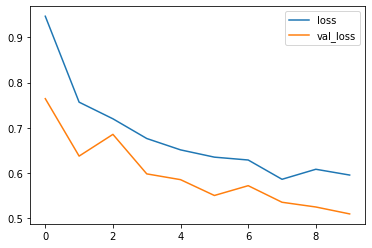

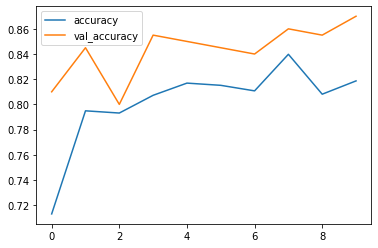

In [ ]:

model_history = pd.DataFrame(modell.history.history)
model_history[['loss', 'val_loss']].plot()
model_history[['accuracy', 'val_accuracy']].plot()

the above figures shows that our model has performed well, we will use it to make predictions on any of the images gotten from the dataset that was used to train our model.
Below will be an implementation of predicting an image that belongs to a car

1/1 [==============================] - 0s 270ms/step
 This image most likely belongs to 'cars' with a 51.47 percent confidence.


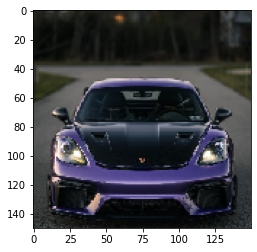

In [ ]:
def make_your_prediction(YOUR_IMAGE_PATH = None):
    if YOUR_IMAGE_PATH == None:
        YOUR_IMAGE_PATH = '../tochora/popd/294.jpg' 
    
    img = image.load_img(YOUR_IMAGE_PATH, target_size=(150, 150))
    plt.imshow(img)
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = modell.predict(images, batch_size=10)
    score = tf.nn.sigmoid(classes[0])

    class_name = training_generator.class_indices
    class_name_inverted = {y: x for x, y in class_name.items()}

    if classes[0]>0.5:
        print(f" This image most likely belongs to '{class_name_inverted[1]}' with a {100 * np.max(score):.2f} percent confidence.")
    else:
        print(f" This image most likely belongs to '{class_name_inverted[0]}' with a {100 * np.max(score):.2f} percent confidence.")

make_your_prediction(YOUR_IMAGE_PATH = None)

seems our model predicted that the image above is a car with 51.47 accuracy.

Let us check its prediction on a image belonging to tanker

1/1 [==============================] - 2s 2s/step
 This image most likely belongs to 'tanks' with a 67.74 percent confidence.


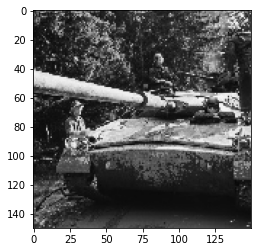

In [ ]:
def make_your_prediction(YOUR_IMAGE_PATH = None):
    if YOUR_IMAGE_PATH == None:
        YOUR_IMAGE_PATH = '../tochora/popd/573.jpg' 
    
    img = image.load_img(YOUR_IMAGE_PATH, target_size=(150, 150))
    plt.imshow(img)
    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = modell.predict(images, batch_size=10)
    score = tf.nn.sigmoid(classes[0])

    class_name = training_generator.class_indices
    class_name_inverted = {y: x for x, y in class_name.items()}

    if classes[0]>0.5:
        print(f" This image most likely belongs to '{class_name_inverted[1]}' with a {100 * np.max(score):.2f} percent confidence.")
    else:
        print(f" This image most likely belongs to '{class_name_inverted[0]}' with a {100 * np.max(score):.2f} percent confidence.")
make_your_prediction(YOUR_IMAGE_PATH=None)

wow! it predicts that the image above is a tanker with an accuracy 68%.